In [1]:
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from gam_follow_up import config, utils
from common import plotting
from gamtools import segregation

# Mapping statistics

In [2]:
multiplex_mapping = pd.read_csv(
    config.in_data_raw('multiplex-gam-data/gamtools_output/merged_stats.txt'),
    delim_whitespace=True)

In [3]:
mapping_3np = []
expt_nos = np.sort(multiplex_mapping.expt_no.unique())
for expt in expt_nos:
    expt_map = multiplex_mapping.loc[
        np.logical_and(
            multiplex_mapping.expt_no == expt,
            multiplex_mapping.optimization_only == False),
        'Percent_mapped_reads'].values
    mapping_3np.append(expt_map)

In [4]:
multiplex_mapping[multiplex_mapping.optimization_only == False].shape

(330, 27)

In [9]:
multiplex_mapping[np.logical_and(np.logical_and(
        multiplex_mapping.optimization_only == False,
        multiplex_mapping.Percent_mapped_reads > 15),
                 multiplex_mapping.tube_contents == '4np')].shape

(249, 27)

In [7]:
multiplex_mapping.columns

Index([u'Sample', u'filename', u'run_id', u'sample_id', u'treatment',
       u'tube_contents', u'expt', u'directory', u'expt_no', u'new_filename',
       u'optimization_only', u'Reads_sequenced', u'Reads_mapped',
       u'Unique_reads_mapped', u'Percent_mapped_reads', u'avg_quality',
       u'dinucleotide_repeats', u'mononucleotide_repeats',
       u'Ecoli_screen_result', u'Human_screen_result', u'Mouse_screen_result',
       u'Rat_screen_result', u'Unmapped_screen_result', u'Yeast_screen_result',
       u'Genome_coverage', u'Positive_chromosomes',
       u'Proportion_with_neighbours'],
      dtype='object')

In [4]:
expt_nos

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [5]:
np.sum([a.size for a in mapping_3np])

330

In [6]:
singlet_mapping = pd.read_csv(
    config.in_data_raw('1np-gam-data/gamtools_output/merged_stats.txt'),
    delim_whitespace=True).Percent_mapped_reads.values

In [12]:
!mkdir ../../out/figures/fig-s3

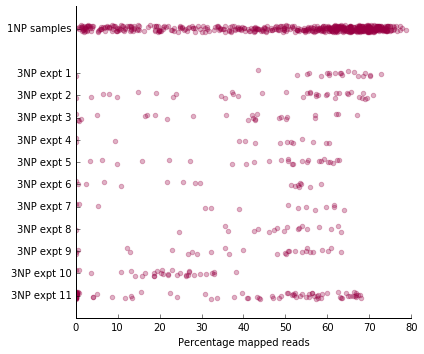

In [20]:
plt.figure(figsize=(6,5), facecolor='white')

_b = plotting.dotplot(reversed([singlet_mapping] + [np.array([])] + mapping_3np),
                      alpha=0.3, color='#980043', horizontal=True, median=False)

plotting.simpleaxis()

plt.xlabel('Percentage mapped reads')

n_exp = len(mapping_3np)

plt.yticks(range(n_exp) + [n_exp+1],
           ['3NP expt {}'.format(e) for e in reversed(expt_nos)
           ] + ['1NP samples'])

plt.xlim(0, 80)
plt.ylim(-1,13)
plt.tight_layout()
plt.savefig(
    config.in_figures('fig-s3/dataset-mapped-reads.eps'))

# Coverage statistics

In [14]:
coverage_all = []
for expt in expt_nos:
    expt_coverage = 100 * multiplex_mapping.loc[
        utils.chain_and(multiplex_mapping.expt_no == expt,
                        multiplex_mapping.Percent_mapped_reads > 15,
                        multiplex_mapping.optimization_only == False),
        'Genome_coverage'].values
    coverage_all.append(expt_coverage)

In [15]:
mesc_1NP_40kb = segregation.open_segregation(
    config.in_data_raw('1np-gam-data/gamtools_output/segregation_at_40kb.passed_qc.table'))

mesc_1NP_40kb_coverage = (100 * mesc_1NP_40kb.mean()).values

mesc_4NP_40kb_in_silico_coverage = (100 * utils.get_merged(mesc_1NP_40kb, 3).mean()).values

coverage_1np = [mesc_1NP_40kb_coverage, mesc_4NP_40kb_in_silico_coverage]

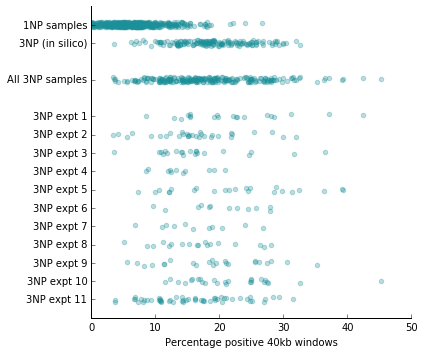

In [21]:
plt.figure(figsize=(6,5), facecolor='white')

_b = plotting.dotplot(reversed(coverage_1np + [np.array([])] + [np.concatenate(coverage_all)] + [np.array([])] + coverage_all),
                      alpha=0.3, color='#1c9099', horizontal=True, median=False)

plotting.simpleaxis()

plt.xlabel('Percentage positive 40kb windows')

n_exp = len(coverage_all)

plt.yticks(range(n_exp) + [n_exp+1, n_exp+3, n_exp+4],
           ['3NP expt {}'.format(e) for e in range(len(coverage_all), 0, -1)
           ] + ['All 3NP samples', '3NP (in silico)', '1NP samples'])

plt.xlim(0, 50)
plt.ylim(-1,16)
plt.tight_layout()
plt.savefig(
    config.in_figures('fig-s3/dataset-genome-coverage.eps'))